<a href="https://colab.research.google.com/github/bala-codes/FAKE-VS-REAL-NEWS-CLASSIFIER-USING-ML-AND-DL-MODELS/blob/master/codes%20(ML)/Part%202%20of%20Fake%20or%20Real%20News%20Classifier%20Single%20Input%20Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IF YOU ARE USING GOOGLE COLABORATORY AND IF YOUR DATA IS STORED IN GOOGLE DRIVE, THEN RUN THIS CODE OTHERWISE DON'T EXECUTE

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import datetime
now = datetime.datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
with open("/content/gdrive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/nb_classifier.pkl", "rb") as fin:
  vectorizer, nb_classifier = pickle.load(fin)
 
with open("/content/gdrive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/SVC_classifier.pkl", "rb") as fin:
  vectorizer, svc_classifier = pickle.load(fin)

with open("/content/gdrive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/SVC_N_classifier.pkl", "rb") as fin:
  vectorizer, SVC_N_classifier = pickle.load(fin)
 
with open("/content/gdrive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/pac_classifier.pkl", "rb") as fin:
  vectorizer, pac_classifier = pickle.load(fin)
 
with open("/content/gdrive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/calibrator_classifier.pkl", "rb") as fin:
  vectorizer, calibrator_classifier = pickle.load(fin)
  
with open("/content/gdrive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/logreg_classifier.pkl", "rb") as fin:
  vectorizer, logreg_classifier = pickle.load(fin)

with open("/content/gdrive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/Pretrained - Models/logregcv_classifier.pkl", "rb") as fin:
  vectorizer, logregcv_classifier = pickle.load(fin)


print("SUCCESS ALL MODELS LOADED")

In [ ]:
# Required Functions to predict the News
def prediction(text):
  test = vectorizer.transform(text)
  graph,output = ensemble(test)

  if output == 1:
    value = 'REAL'
  else:
    value = 'FAKE'

  class_labels = ['FAKE','REAL']
  j = [graph[0][0],graph[0][1]]
  y_pos = np.arange(len(class_labels))
  plt.barh(y_pos,j)
  plt.yticks(y_pos,class_labels)
  plt.title('PREDICTION FOR BEING FAKE VS REAL')
  plt.ylabel('Percentage')
  plt.xlabel('Labels')
  plt.show()
  print()
  start = "\033[1m"
  end = "\033[0;0m"
  print('THE GIVEN NEWS ARTICLE IS ' + start + str(value) + end)

def ensemble(x):
  pred1 = logreg_classifier.predict_proba(x)
  pred2 = nb_classifier.predict_proba(x)
  pred3 = svc_classifier._predict_proba_lr(x)
  pred4 = pac_classifier._predict_proba_lr(x)
  pred5 = calibrator_classifier.predict_proba(x)
  pred6 = SVC_N_classifier.predict_proba(x)
  pred7 = logregcv_classifier.predict_proba(x)

  test_pred_prob = np.mean([pred1, pred2, pred3, pred4, pred5, pred6, pred7], axis=0)
  pred = np.argmax(test_pred_prob, axis=1)
  return test_pred_prob,pred


# GIVE YOUR INPUT HERE

ENTER THE NEWS ARTCILE HERE : ENTER THE NEWS ARTCILE HERE : History was created Thursday when Jammu and Kashmir, which has been part of the Union of India since 1947, ceased to be a state and was officially bifurcated into two Union Territories The decision was taken 72 years after the then ruler of the princely state, Maharaja Hari Singh, executed the Instrument of Accession on 26 October, 1947, making it part of the Union of India According to the Act, the UT of Jammu and Kashmir will have a legislature like Puducherry while Ladakh will be a UT without legislature like Chandigarh and both the UTs will be headed by two separate Lieutenant Governors (LG) IAS officers Girish Chandra Murmu and RK Mathur, who have been appointed the new LGs for the UTs of Jammu and Kashmir, and Ladakh, respectively, will be sworn-in at separate functions to be held in Srinagar and Leh on Thursday The Centre will be in direct control of the police and the law and order in Jammu and Kashmir from Thursday wh

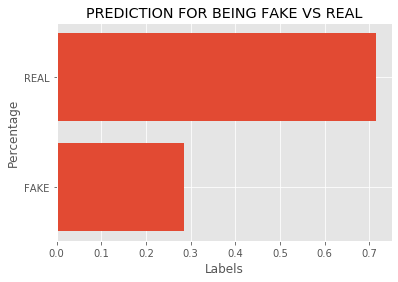


THE GIVEN NEWS ARTICLE IS REAL


In [ ]:
#String input
x = input("ENTER THE NEWS ARTCILE HERE : ")
x=[x,]
prediction(x)